In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.2.0


## Import fashion MNIST dataset


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
np.random.seed(1402)
tf.random.set_seed(1981)

x_train, y_train, x_valid, y_valid, x_test ,y_test = [], [], [], [], [], []
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state = 100)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_valid = x_valid.reshape(len(x_valid),28,28,1)

y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# available labels for classification problem
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

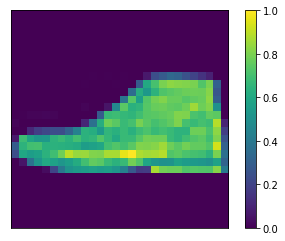

Item of type : Ankle boot


In [4]:
# example image from the dataset
plt.figure()
plt.imshow(x_train[0][:, :, 0])
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()
print('Item of type :',class_names[np.argmax(y_train[0])])

# Helper Functions

In [0]:
# summarize history for accuracy in a plot
def plotAccuracy(someHistory):
  plt.style.use('dark_background')
  plt.rcParams['figure.figsize'] = [15, 8]
  plt.rcParams['font.size'] = 16
  plt.plot(someHistory.history['accuracy'])
  plt.plot(someHistory.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
# summarize history for loss in a plot
def plotLoss(someHistory):
  plt.style.use('dark_background')
  plt.rcParams['figure.figsize'] = [15, 8]
  plt.rcParams['font.size'] = 16
  plt.plot(someHistory.history['loss'])
  plt.plot(someHistory.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
# summarize history for loss and accuracy metrics in all 3 datasets (train,validation,loss)
def evaluateModel(someModel,someHistory):
  evaluationResult = someModel.evaluate(x_test, y_test, verbose=2)
  print("Train Loss     : {0:.5f}".format(someHistory.history['loss'][-1]))
  print("Validation Loss: {0:.5f}".format(someHistory.history['val_loss'][-1]))
  print("Test Loss      : {0:.5f}".format(evaluationResult[0]))
  print("---")
  print("Train Accuracy     : {0:.5f}".format(someHistory.history['accuracy'][-1]))
  print("Validation Accuracy: {0:.5f}".format(someHistory.history['val_accuracy'][-1]))
  print("Test Accuracy      : {0:.5f}".format(evaluationResult[1]))

In [0]:
# helper function to plot correctly vs misclassified images
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[:, :, 0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_labelInd = np.argmax(predictions_array)

  if predicted_label == true_labelInd:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_labelInd]),
                                color=color)

In [0]:
# helper function to create a barplot of predicted propabilities per label class
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='grey')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_labelInd = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_labelInd].set_color('blue')

In [0]:
# creates a generic classification report showing: 
# -- correct predicted vs incorrect predicted classes
# -- sklearn classification_report() to show accuracy, precision and f1-score
# -- the output of plot_image & plot_value_array
def clasfication_report(aModel):
  num_rows = 10
  num_cols = 3
  num_images = num_rows*num_cols
  plt.style.use('ggplot')
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  predictions = aModel.predict(x_test)

  y_test_lbl = np.where(y_test==1)[1]
  y_pred_lbl = np.argmax(predictions, axis=1)

  correct = sum(y_test_lbl==y_pred_lbl)
  incorrect = sum(y_test_lbl!=y_pred_lbl)
  print("Correctly predicted classes:",correct)
  print("Incorrectly predicted classes:",incorrect)
  print()
  print(classification_report(y_test_lbl, y_pred_lbl, target_names=class_names))
  print()
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
  plt.tight_layout()
  plt.show()

In [0]:
# creates an early stoping callback monitoring val_accuracy to be used when fitting the model
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Simple CNN

In [0]:
modelCNN = keras.Sequential([
  keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='softmax')
])

In [13]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1081700   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
______________________________________________

In [0]:
modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
historyCNN = modelCNN.fit(x_train, y_train,
					batch_size=64,
					epochs=50,
					verbose=2,
					callbacks=[early_stopping_cb],
					validation_data=(x_valid, y_valid))

Epoch 1/50
750/750 - 5s - loss: 0.7074 - accuracy: 0.7505 - val_loss: 0.3541 - val_accuracy: 0.8721
Epoch 2/50
750/750 - 5s - loss: 0.4620 - accuracy: 0.8342 - val_loss: 0.3138 - val_accuracy: 0.8840
Epoch 3/50
750/750 - 5s - loss: 0.3943 - accuracy: 0.8584 - val_loss: 0.2860 - val_accuracy: 0.8970
Epoch 4/50
750/750 - 5s - loss: 0.3564 - accuracy: 0.8702 - val_loss: 0.2757 - val_accuracy: 0.8963
Epoch 5/50
750/750 - 5s - loss: 0.3317 - accuracy: 0.8799 - val_loss: 0.2605 - val_accuracy: 0.9042
Epoch 6/50
750/750 - 5s - loss: 0.3086 - accuracy: 0.8880 - val_loss: 0.2563 - val_accuracy: 0.9056
Epoch 7/50
750/750 - 5s - loss: 0.2926 - accuracy: 0.8923 - val_loss: 0.2514 - val_accuracy: 0.9091
Epoch 8/50
750/750 - 5s - loss: 0.2733 - accuracy: 0.8989 - val_loss: 0.2524 - val_accuracy: 0.9106
Epoch 9/50
750/750 - 5s - loss: 0.2619 - accuracy: 0.9024 - val_loss: 0.2484 - val_accuracy: 0.9095
Epoch 10/50
750/750 - 5s - loss: 0.2557 - accuracy: 0.9043 - val_loss: 0.2531 - val_accuracy: 0.9135

313/313 - 1s - loss: 0.2713 - accuracy: 0.9092
Train Loss     : 0.16126
Validation Loss: 0.28455
Test Loss      : 0.27128
---
Train Accuracy     : 0.93546
Validation Accuracy: 0.91442
Test Accuracy      : 0.90920



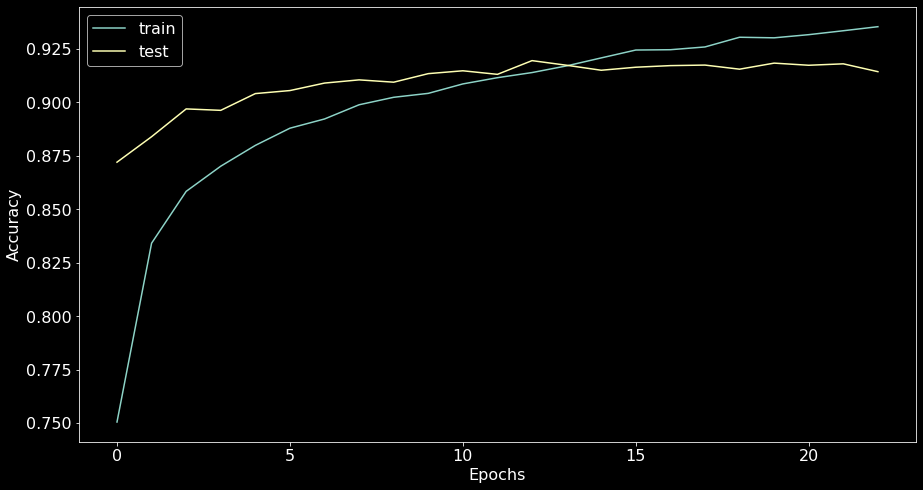

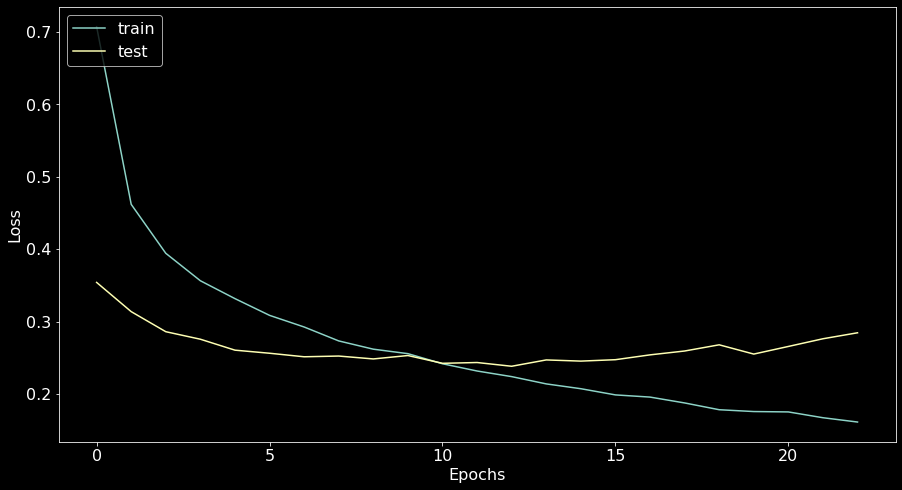

In [16]:
evaluateModel(modelCNN,historyCNN)
print()
plotAccuracy(historyCNN)
print()
plotLoss(historyCNN)

Correctly predicted classes: 9092
Incorrectly predicted classes: 908

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.85      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.82      0.90      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.69      0.72      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000




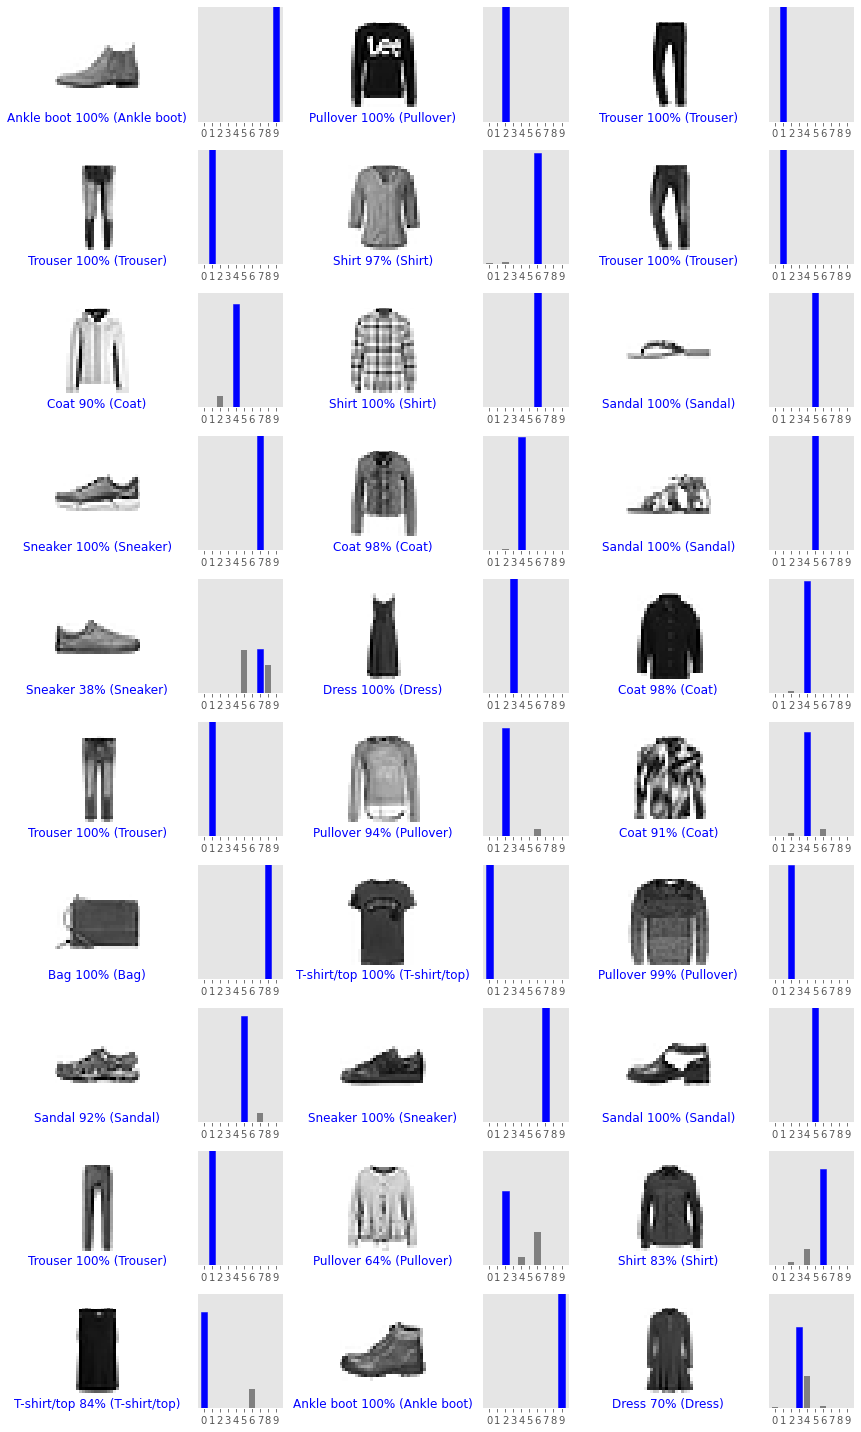

In [17]:
clasfication_report(modelCNN)

# CNN 1

In [18]:
modelCNN1 = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'),
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

modelCNN1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
modelCNN1.summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1327232   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [19]:
historyCNN1 = modelCNN1.fit(x_train, y_train,
					batch_size=128,
					epochs=50,
					verbose=2,
					callbacks=[early_stopping_cb],
					validation_data=(x_valid, y_valid))

Epoch 1/50
375/375 - 5s - loss: 0.4525 - accuracy: 0.8377 - val_loss: 0.3497 - val_accuracy: 0.8707
Epoch 2/50
375/375 - 5s - loss: 0.2840 - accuracy: 0.8959 - val_loss: 0.2718 - val_accuracy: 0.8984
Epoch 3/50
375/375 - 5s - loss: 0.2359 - accuracy: 0.9134 - val_loss: 0.2609 - val_accuracy: 0.9066
Epoch 4/50
375/375 - 5s - loss: 0.1968 - accuracy: 0.9271 - val_loss: 0.2340 - val_accuracy: 0.9125
Epoch 5/50
375/375 - 5s - loss: 0.1663 - accuracy: 0.9394 - val_loss: 0.2360 - val_accuracy: 0.9135
Epoch 6/50
375/375 - 5s - loss: 0.1374 - accuracy: 0.9484 - val_loss: 0.2547 - val_accuracy: 0.9145
Epoch 7/50
375/375 - 5s - loss: 0.1141 - accuracy: 0.9576 - val_loss: 0.2530 - val_accuracy: 0.9173
Epoch 8/50
375/375 - 5s - loss: 0.0896 - accuracy: 0.9677 - val_loss: 0.2931 - val_accuracy: 0.9169
Epoch 9/50
375/375 - 5s - loss: 0.0746 - accuracy: 0.9727 - val_loss: 0.2893 - val_accuracy: 0.9161
Epoch 10/50
375/375 - 5s - loss: 0.0562 - accuracy: 0.9796 - val_loss: 0.2909 - val_accuracy: 0.9187

313/313 - 1s - loss: 0.3449 - accuracy: 0.9170
Train Loss     : 0.01900
Validation Loss: 0.49118
Test Loss      : 0.34492
---
Train Accuracy     : 0.99358
Validation Accuracy: 0.92075
Test Accuracy      : 0.91700



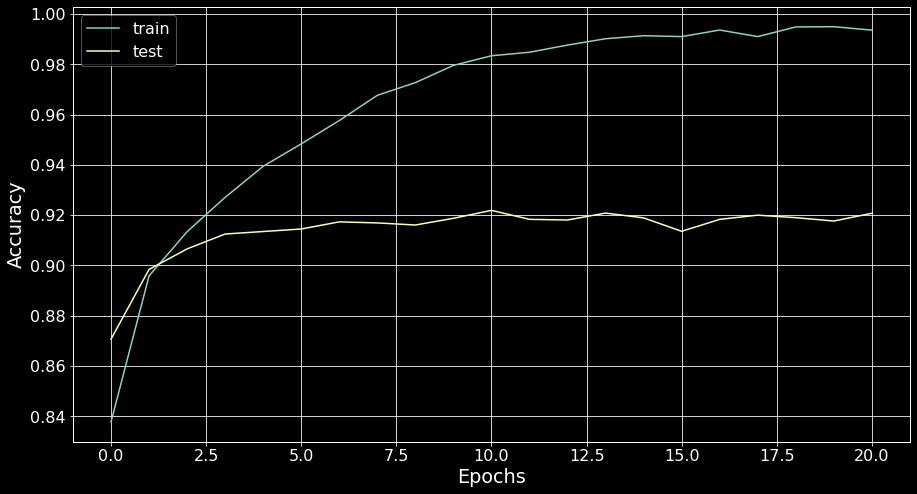

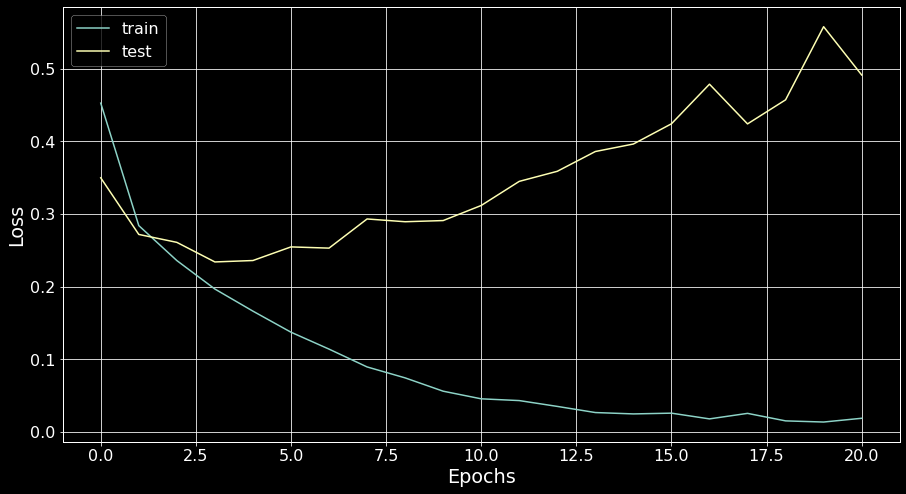

In [20]:
evaluateModel(modelCNN1,historyCNN1)
print()
plotAccuracy(historyCNN1)
print()
plotLoss(historyCNN1)

Correctly predicted classes: 9170
Incorrectly predicted classes: 830

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.85      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.89      0.87      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.78      0.74      0.76      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000




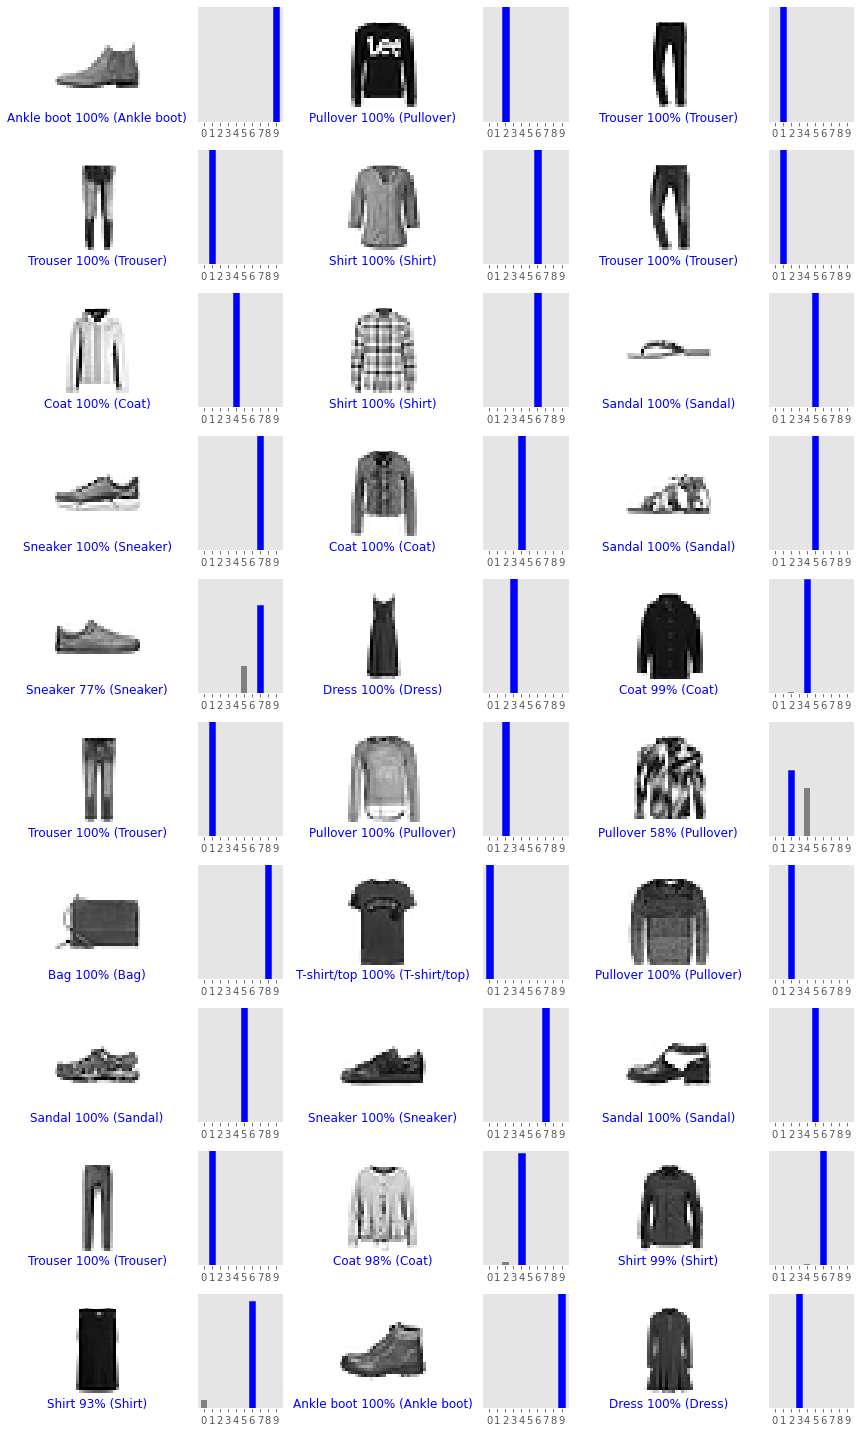

In [21]:
clasfication_report(modelCNN1)

# CNN2

In [22]:
modelCNN2 = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(10, activation='softmax')
])

modelCNN2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
modelCNN2.summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9, 128)        

In [23]:
historyCNN2 = modelCNN2.fit(x_train, y_train,
					batch_size=128,
					epochs=50,
					verbose=2,
					callbacks=[early_stopping_cb],
					validation_data=(x_valid, y_valid))

Epoch 1/50
375/375 - 6s - loss: 0.6655 - accuracy: 0.7567 - val_loss: 0.3855 - val_accuracy: 0.8538
Epoch 2/50
375/375 - 6s - loss: 0.4269 - accuracy: 0.8463 - val_loss: 0.3084 - val_accuracy: 0.8872
Epoch 3/50
375/375 - 6s - loss: 0.3651 - accuracy: 0.8676 - val_loss: 0.2801 - val_accuracy: 0.8979
Epoch 4/50
375/375 - 6s - loss: 0.3298 - accuracy: 0.8802 - val_loss: 0.2586 - val_accuracy: 0.9062
Epoch 5/50
375/375 - 6s - loss: 0.3082 - accuracy: 0.8878 - val_loss: 0.2497 - val_accuracy: 0.9093
Epoch 6/50
375/375 - 6s - loss: 0.2900 - accuracy: 0.8940 - val_loss: 0.2396 - val_accuracy: 0.9136
Epoch 7/50
375/375 - 6s - loss: 0.2765 - accuracy: 0.8982 - val_loss: 0.2262 - val_accuracy: 0.9179
Epoch 8/50
375/375 - 6s - loss: 0.2669 - accuracy: 0.9021 - val_loss: 0.2376 - val_accuracy: 0.9106
Epoch 9/50
375/375 - 6s - loss: 0.2575 - accuracy: 0.9050 - val_loss: 0.2195 - val_accuracy: 0.9177
Epoch 10/50
375/375 - 6s - loss: 0.2501 - accuracy: 0.9070 - val_loss: 0.2236 - val_accuracy: 0.9160

313/313 - 1s - loss: 0.2245 - accuracy: 0.9295
Train Loss     : 0.14915
Validation Loss: 0.19899
Test Loss      : 0.22446
---
Train Accuracy     : 0.94277
Validation Accuracy: 0.93325
Test Accuracy      : 0.92950



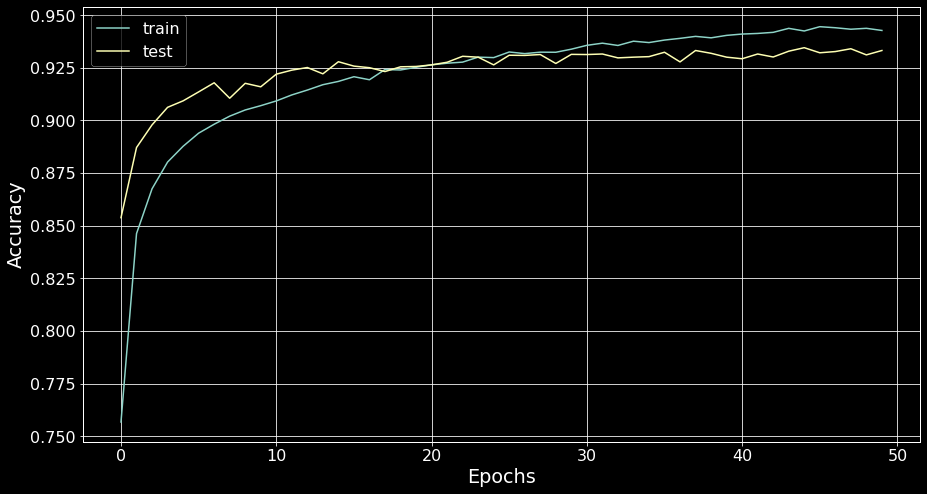

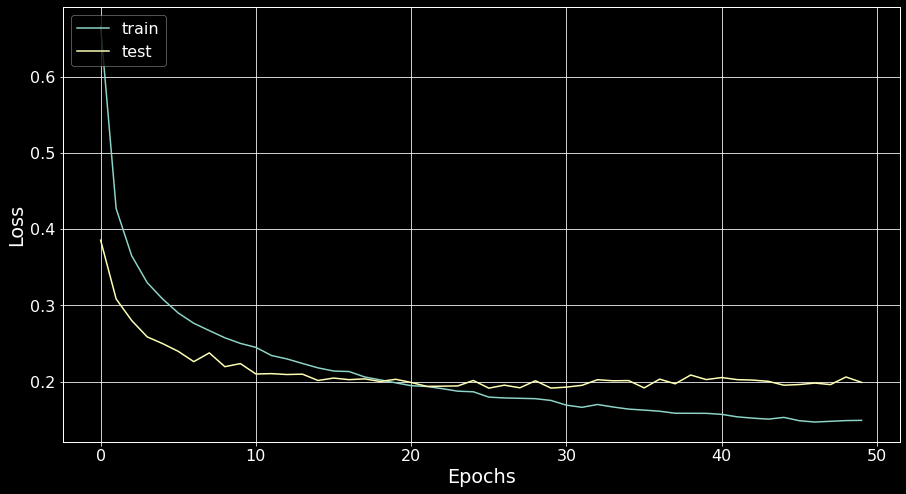

In [24]:
evaluateModel(modelCNN2,historyCNN2)
print()
plotAccuracy(historyCNN2)
print()
plotLoss(historyCNN2)

Correctly predicted classes: 9295
Incorrectly predicted classes: 705

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.90      0.89      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.91      0.89      1000
       Dress       0.94      0.94      0.94      1000
        Coat       0.89      0.89      0.89      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.81      0.76      0.78      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000




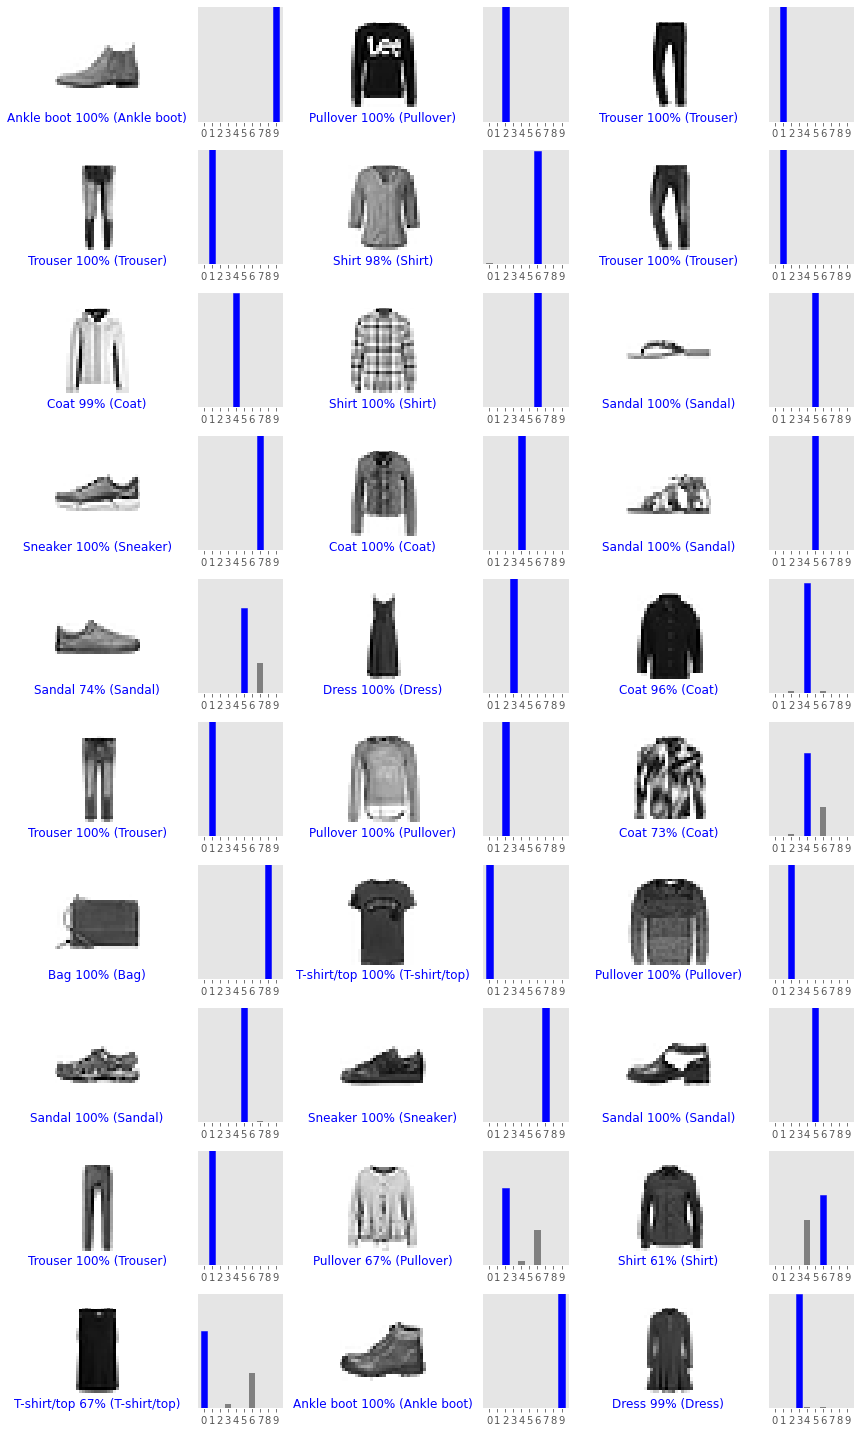

In [25]:
clasfication_report(modelCNN2)